### Import libs:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Get Data

In [2]:
# A dataset for heart attack classification 
heart_df = pd.read_csv('heart.csv')

# dateset to help charts
clone_heart_df = pd.read_csv('heart.csv')
display(heart_df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### About this dataset
###### Reff link: *https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset*

**Age** : Age of the patient

**Sex** : Sex of the patient

**exang** : Exercise induced angina (**1** = yes; **0** = no)

**ca** : Number of major vessels (0-3)

**cp** : Chest Pain type chest pain type
Value **1**: typical angina
Value **2**: atypical angina
Value **3**: non-anginal pain
Value **4**: asymptomatic

**trtbps** : Resting blood pressure (in mm Hg)

**chol** : Cholestoral in mg/dl fetched via BMI sensor

**fbs** : (Fasting blood sugar > 120 mg/dl) (**1** = true; **0** = false)

**rest_ecg** : Resting electrocardiographic results
Value **0**: normal
Value **1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value **2**: showing probable or definite left ventricular hypertrophy by Estes' criteria
                
**thalach** : Maximum heart rate achieved

**target** : 
**0** = less chance of heart attack
**1** = More chance of heart attack


### Data processing (Data cleaning)

In [ ]:
# some null value?
heart_df.isnull().sum()

In [ ]:
# some NaN value?
heart_df.isna().sum()

### Rename cloned dataset for charts

In [3]:
clone_heart_df.loc[clone_heart_df['sex'] == 0, 'sex'] = 'F'
clone_heart_df.loc[clone_heart_df['sex'] == 1, 'sex'] = 'M'

clone_heart_df.loc[clone_heart_df['exng'] == 1, 'exng'] = 'Yes'
clone_heart_df.loc[clone_heart_df['exng'] == 0, 'exng'] = 'No'

clone_heart_df.loc[clone_heart_df['fbs'] == 1, 'fbs'] = 'True'
clone_heart_df.loc[clone_heart_df['fbs'] == 0, 'fbs'] = 'False'

clone_heart_df.loc[clone_heart_df['cp'] == 0, 'cp'] = 'Typical angina'
clone_heart_df.loc[clone_heart_df['cp'] == 1, 'cp'] = 'Atypical angina'
clone_heart_df.loc[clone_heart_df['cp'] == 2, 'cp'] = 'Non-anginal pain'
clone_heart_df.loc[clone_heart_df['cp'] == 3, 'cp'] = 'Asymptomatic'

clone_heart_df.loc[clone_heart_df['restecg'] == 0, 'restecg'] = 'Normal'
clone_heart_df.loc[clone_heart_df['restecg'] == 1, 'restecg'] = 'ST-T wave abnormality'
clone_heart_df.loc[clone_heart_df['restecg'] == 2, 'restecg'] = 'Left ventricular hypertrophy'

clone_heart_df.loc[clone_heart_df['output'] == 0, 'output'] = 'Less chance'
clone_heart_df.loc[clone_heart_df['output'] == 1, 'output'] = 'More chance'


display(clone_heart_df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,M,Asymptomatic,145,233,True,Normal,150,No,2.3,0,0,1,More chance
1,37,M,Non-anginal pain,130,250,False,ST-T wave abnormality,187,No,3.5,0,0,2,More chance
2,41,F,Atypical angina,130,204,False,Normal,172,No,1.4,2,0,2,More chance
3,56,M,Atypical angina,120,236,False,ST-T wave abnormality,178,No,0.8,2,0,2,More chance
4,57,F,Typical angina,120,354,False,ST-T wave abnormality,163,Yes,0.6,2,0,2,More chance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,F,Typical angina,140,241,False,ST-T wave abnormality,123,Yes,0.2,1,0,3,Less chance
299,45,M,Asymptomatic,110,264,False,ST-T wave abnormality,132,No,1.2,1,0,3,Less chance
300,68,M,Typical angina,144,193,True,ST-T wave abnormality,141,No,3.4,1,2,3,Less chance
301,57,M,Typical angina,130,131,False,ST-T wave abnormality,115,Yes,1.2,1,1,3,Less chance


### Some charts for analysis

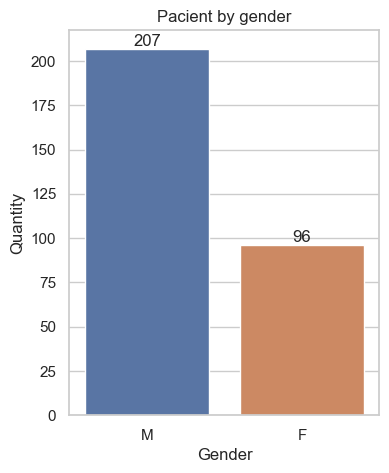

In [66]:
# Pacient by gender

sns.set_theme(style="whitegrid")
ax = sns.countplot(x ='sex', data = clone_heart_df, dodge=False)

ax.set_title('Pacient by gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Quantity')
ax.figure.set_size_inches(4,5)

for container in ax.containers:
    ax.bar_label(container)


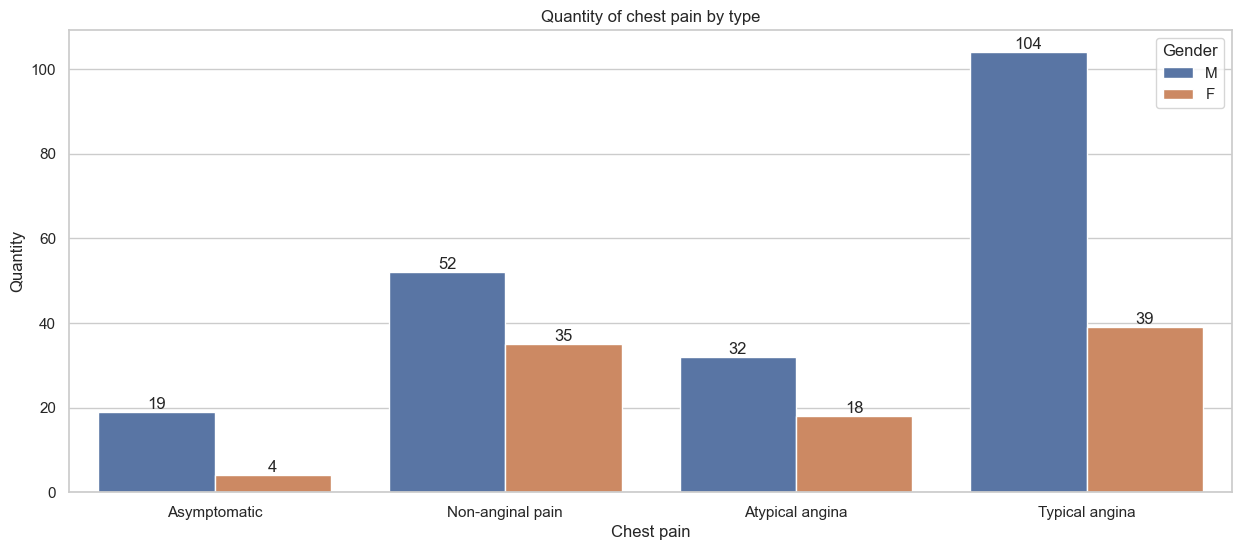

In [73]:
sns.set_theme(style="whitegrid")

g = sns.countplot(
                 x = "cp",
                 data = clone_heart_df, 
                 hue = "sex",
                 dodge=True)

g.set_title('Quantity of chest pain by type')
g.set_xlabel('Chest pain')
g.set_ylabel('Quantity')

plt.legend(title='Gender')

g.figure.set_size_inches(15,6)

for container in g.containers:
    g.bar_label(container)

